# Experience 1 - World Cantril Ladder Scores
---
Hi all! Thanks for joining me! Today, I am going to examine this [dataset](https://ourworldindata.org/happiness-and-life-satisfaction)

In essence, the cantril ladder refers to a life evaluation question as follows:

`"Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?"`


This was my first time hearing about the question - it piqued my interest as I have never done much research with regards to the concept of 'happiness'

---
That said, when the data was first introduced in class, I was immediately interested as although the available data analysis tool (in the report) was rather robust, it failed to provide answers to the questions such as 

- the least happy country of all time
- is there any one country that is consistently last
- the mean happiness over time

As such, I decide to take a look at this data using (jupyter notebook)[https://jupyter.org/]

Also, i would like to urge my readers - please feel free to reach out + comment if you have any questions. I understand the code might seem daunting at first - but I assure you it's manageable to get the hang of it after a awhile & I am more than happy to answer any questions you may have! (Assuming it is week 3 - 6 / week 8 - 11) ;-)

Here, I import the coding libraries that I will require later for data analysis.

In [1]:
import pandas as pd
import math as math
import seaborn as sns
import matplotlib as plt

# Reading in Data + Basic Exploration

Moving on, I first read in the excel file in python. Afterwards, I conducted very basic [exploratory analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) to investigate the size, columns and cleanliness of the dataset.

In [2]:
cantril_ladder = pd.read_csv("happiness-cantril-ladder.csv")

In [3]:
cantril_ladder.head(2)

,Entity,Code,Year,World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778


In [4]:
cantril_ladder.shape

(1704, 4)

In [5]:
cantril_ladder.info

<bound method DataFrame.info of            Entity Code  Year  \
0     Afghanistan  AFG  2008   
1     Afghanistan  AFG  2009   
2     Afghanistan  AFG  2010   
3     Afghanistan  AFG  2011   
4     Afghanistan  AFG  2012   
...           ...  ...   ...   
1699     Zimbabwe  ZWE  2014   
1700     Zimbabwe  ZWE  2015   
1701     Zimbabwe  ZWE  2016   
1702     Zimbabwe  ZWE  2017   
1703     Zimbabwe  ZWE  2018   

      World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))  
0                                              3.723590                
1                                              4.401778                
2                                              4.758381                
3                                              3.831719                
4                                              3.782938                
...                                                 ...                
1699                                           4.184451                
1700   

In [6]:
cantril_ladder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 4 columns):
Entity                                                             1704 non-null object
Code                                                               1704 non-null object
Year                                                               1704 non-null int64
World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))    1704 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.4+ KB


#### Here, I changed the name of the rightmost column - the older name was too long of a hassle to read

In [7]:
cantril_ladder['Cantril_Score'] = cantril_ladder['World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))']



In [8]:
cantril_ladder.head(2)

,Entity,Code,Year,World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best)),Cantril_Score
0,Afghanistan,AFG,2008,3.723590,3.723590
1,Afghanistan,AFG,2009,4.401778,4.401778


In [9]:
cantril_ladder.drop('World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))', 
                   inplace=True, axis=1)

In [10]:
cantril_ladder.head(2)

,Entity,Code,Year,Cantril_Score
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778


# Question 1: Mean score in 2018 vs 2005

Here, I would like to examine how the mean cantril score has changed over time, taking the start and end of the data. 

I first filtered the data, creating two datasets, one for the year 2018 and the other for 2005. Afterwards, I then find out the mean score for both years. 

In [11]:
cantril_ladder_2018 = cantril_ladder[cantril_ladder['Year'] == 2018]
cantril_ladder_2005 = cantril_ladder[cantril_ladder['Year'] == 2005]


In [12]:
mean_ladder_score_2018 = cantril_ladder_2018['Cantril_Score'].mean()
mean_ladder_score_2005 = cantril_ladder_2005['Cantril_Score'].mean()

print("Comparing 2005 and 2018 \
    \nThe mean score in 2018 was {} while the mean score in 2005 was {}".format(round(mean_ladder_score_2018,1), round(mean_ladder_score_2005,1)))

Comparing 2005 and 2018     
The mean score in 2018 was 5.5 while the mean score in 2005 was 6.4


#### Checkpoint 1.1
---
Surprisingly, it seemed like the mean cantril ladder score has falled over the past 13 years, even though there have been significant advances in technology. However, I decided to test the **validity** of my data a little more. 

Next, I will take a look at the mean score over time.


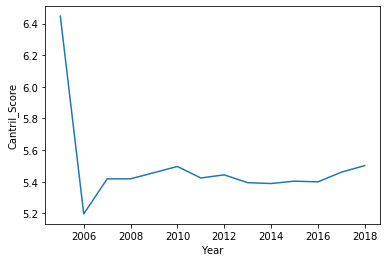

In [13]:
sns.lineplot(x='Year',
            y='Cantril_Score',
            data= cantril_ladder.groupby(['Year']).mean().reset_index()
           )

#### Checkpoint 1.2

Surprisingly, there is a significant drop between 2005 and 2006. Here, I hypothesize that  there might be an issue with the data collection - taking a further look. Here, I examine how many countries are sampled for each year.

In [14]:
cantril_ladder.groupby('Year').count()

,Entity,Code,Cantril_Score
Year,,,
2005,27,27,27
2006,89,89,89
2007,102,102,102
2008,110,110,110
2009,114,114,114
2010,124,124,124
2011,146,146,146
2012,142,142,142
2013,137,137,137


#### Checkpoint 1.3 

Here, I realise the main issue with the data is a significant increase in the number of countries being samples year-on-year. As such, using the mean score as a comparison will not work, unless I keep n constant, where n refers to the number of countries. 

#### Checkpoint 1.4

Looking at the first 27 countries, comparing them for 2005 and 2018

In [15]:
cantril_05_18_merged = cantril_ladder_2005.merge(cantril_ladder_2018, how='left',
                         on=['Entity', 'Code'])
# joining the two dataframes together, keeping only the first 27 countries. 

In [16]:
cantril_score_05_mean = cantril_05_18_merged['Cantril_Score_x'].mean()

print("Mean Cantril Score in 2005 is {}".format(round(cantril_score_05_mean,3)))

Mean Cantril Score in 2005 is 6.446


In [17]:
cantril_score_18_mean = cantril_05_18_merged['Cantril_Score_y'].mean()

print("Mean Cantril Score in 2018 is {}".format(round(cantril_score_18_mean,3)))

Mean Cantril Score in 2018 is 6.201


#### Checkpoint 1.5 

After accounting for only the first 27 countries, there still seems to be a decline in the mean cantrill score, which is surprising to me - I would have felt that in light of technological improvements and efficiency, cantril scores should have increased. especially when the 27 countries are rather developed.

In [18]:
list_of_27_countries = cantril_05_18_merged['Entity'].tolist()
print(list_of_27_countries)

['Australia', 'Belgium', 'Brazil', 'Canada', 'Czech Republic', 'Denmark', 'Egypt', 'France', 'Germany', 'Greece', 'Hungary', 'Iran', 'Italy', 'Japan', 'Jordan', 'Lebanon', 'Mexico', 'Netherlands', 'Pakistan', 'Poland', 'Romania', 'Saudi Arabia', 'Spain', 'Sweden', 'Turkey', 'United Kingdom', 'Venezuela']


In [19]:
cantril_05_18_concat = pd.concat([cantril_ladder_2005,
                                  cantril_ladder_2018[cantril_ladder_2018['Entity'].isin(list_of_27_countries)]])

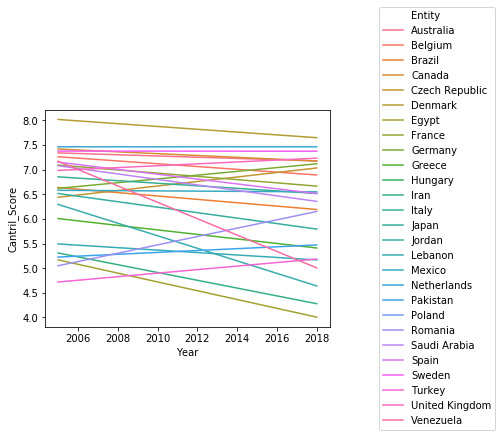

In [20]:
g = sns.lineplot(x='Year',
            y='Cantril_Score',
            data=cantril_05_18_concat,
            hue='Entity')

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.6, 0.5), ncol=1)



#### Checkpoint 1.6

**NOT A GOOD GRAPH**, there are too many entities in play. I decide to forego a lineplot and try getting a distribution of the percentage change in cantril scores.

In [21]:
cantril_05_18_merged.head(2)

,Entity,Code,Year_x,Cantril_Score_x,Year_y,Cantril_Score_y
0,Australia,AUS,2005,7.340688,2018.0,7.176993
1,Belgium,BEL,2005,7.262290,2018.0,6.892172


In [22]:
cantril_05_18_merged.rename(columns={"Cantril_Score_x":"Cantril_Score_2005",
                                    "Cantril_Score_y": "Cantril_Score_2018"},
                           inplace=True)

In [23]:
cantril_05_18_merged.drop(cantril_05_18_merged.index[[10,19]],
                         inplace=True)

In [24]:
cantril_05_18_merged['% Change in Cantril_Score'] = (cantril_05_18_merged['Cantril_Score_2018'] - cantril_05_18_merged['Cantril_Score_2005'])/cantril_05_18_merged['Cantril_Score_2005'] 



#### Checkpoint 1.7

Having created a column for % change in cantril score for each country from the original, I then will proceed with a histogram plot.

Text(0.5, 1.0, 'Histogram of % Change in Cantril Ladder Scores')

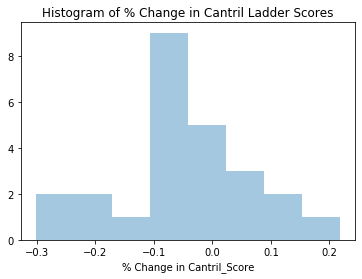

In [25]:
sns.distplot(cantril_05_18_merged['% Change in Cantril_Score'],
            bins=8,
            kde=False).set_title("Histogram of % Change in Cantril Ladder Scores")


#### Checkpoint 1.8 

Interestingly, the distribution of % change follows a normal distribution. A significant number of countries (9) have actually experienced a decline, with the median being at approximately 5% decrease in cantril score.

#### Checkpoint 1.9

Quick check with regards to the median in 2005 vs 2018

In [26]:
median_ladder_score_2018 = cantril_ladder_2018['Cantril_Score'].median()
median_ladder_score_2005 = cantril_ladder_2005['Cantril_Score'].median()

print("Comparing 2005 and 2018 \
    \nThe median score in 2018 was {} while the median score in 2005 was {}".format(round(median_ladder_score_2018,1), round(median_ladder_score_2005,1)))

Comparing 2005 and 2018     
The median score in 2018 was 5.5 while the median score in 2005 was 6.6


#### Conclusion 1

Based on the data, for the original 27 countries surveyed back in 2005, comparing their scores then to their scores today, there has been a general decline of cantril scores, with a median 5% decline!

This is *especially* shocking to me, as I would have expected an increase. A hypothesis would be that this has occurred due to [social media](https://www.fastcompany.com/90415438/yes-social-media-is-making-you-miserable). People are starting to compare themselves more and more, potentially resulting in a decline in cantril ladder scores in said countries.

In [31]:
cantril_05_18_merged.head((2))

,Entity,Code,Year_x,Cantril_Score_2005,Year_y,Cantril_Score_2018,% Change in Cantril_Score
0,Australia,AUS,2005,7.340688,2018.0,7.176993,-0.022300
1,Belgium,BEL,2005,7.262290,2018.0,6.892172,-0.050964


In [32]:
cantril_05_18_merged['Cantril_Score_2018'].median()

6.513370991